In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
ds=pd.read_csv(r"C:\Users\Amirhamza\OneDrive\Desktop\Programs\Fraud Detection\synthetic_fraud_dataset.csv")

In [3]:
ds.head()

,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
0,9608,363,4922.587542,ATM,Travel,TR,12,0.992347,0.947908,1
1,456,692,48.018303,QR,Food,US,21,0.168571,0.224057,0
2,4747,587,136.881960,Online,Travel,TR,14,0.296127,0.125058,0
3,6934,445,80.534719,POS,Clothing,TR,23,0.124801,0.159243,0
4,1646,729,120.041158,Online,Grocery,FR,16,0.098129,0.027542,0


In [4]:
ds.isnull().sum()

transaction_id       0
user_id              0
amount               0
transaction_type     0
merchant_category    0
country              0
hour                 0
device_risk_score    0
ip_risk_score        0
is_fraud             0
dtype: int64

In [5]:
ds.describe()

,transaction_id,user_id,amount,hour,device_risk_score,ip_risk_score,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,500.058700,178.142763,14.247100,0.183773,0.184669,0.050000
std,2886.89568,288.328495,531.647950,5.347383,0.177381,0.175772,0.217956
min,0.00000,0.000000,1.000000,0.000000,0.000030,0.000009,0.000000
25%,2499.75000,247.000000,65.084753,10.000000,0.075721,0.077762,0.000000
50%,4999.50000,503.000000,101.686510,14.000000,0.156583,0.158290,0.000000
75%,7499.25000,750.250000,138.280872,19.000000,0.234939,0.236968,0.000000
max,9999.00000,999.000000,11628.213880,23.000000,0.998737,0.999603,1.000000


In [6]:
ds.drop(columns=["transaction_id"],inplace=True)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            10000 non-null  int64  
 1   amount             10000 non-null  float64
 2   transaction_type   10000 non-null  object 
 3   merchant_category  10000 non-null  object 
 4   country            10000 non-null  object 
 5   hour               10000 non-null  int64  
 6   device_risk_score  10000 non-null  float64
 7   ip_risk_score      10000 non-null  float64
 8   is_fraud           10000 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 703.3+ KB


In [7]:
x=ds.drop(columns=["is_fraud"])
y=ds["is_fraud"]

In [8]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ["transaction_type", "merchant_category", "country"]


In [9]:
for col in categorical_cols:
    print(f"{col} unique values: {ds[col].unique()}")
    print(f"{col} values: {ds[col].value_counts()}")


transaction_type unique values: ['ATM' 'QR' 'Online' 'POS']
transaction_type values: transaction_type
POS       2568
ATM       2529
QR        2506
Online    2397
Name: count, dtype: int64
merchant_category unique values: ['Travel' 'Food' 'Clothing' 'Grocery' 'Electronics']
merchant_category values: merchant_category
Food           2023
Travel         2015
Electronics    2007
Clothing       1982
Grocery        1973
Name: count, dtype: int64
country unique values: ['TR' 'US' 'FR' 'DE' 'UK' 'NG']
country values: country
US    2050
FR    2027
UK    1965
DE    1930
TR    1928
NG     100
Name: count, dtype: int64


In [10]:
# Create a dictionary to save encoder
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    ds[col] = le.fit_transform(ds[col])
    encoders[col] = le  # save the encoder 


In [11]:
for col in categorical_cols:
    print(f"{col} unique values: {ds[col].unique()}")
    print(f"{col} values: {ds[col].value_counts()}")

    

transaction_type unique values: [0 3 1 2]
transaction_type values: transaction_type
2    2568
0    2529
3    2506
1    2397
Name: count, dtype: int64
merchant_category unique values: [4 2 0 3 1]
merchant_category values: merchant_category
2    2023
4    2015
1    2007
0    1982
3    1973
Name: count, dtype: int64
country unique values: [3 5 1 0 4 2]
country values: country
5    2050
1    2027
4    1965
0    1930
3    1928
2     100
Name: count, dtype: int64


In [12]:
ds.head(20)

,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
0,363,4922.587542,0,4,3,12,0.992347,0.947908,1
1,692,48.018303,3,2,5,21,0.168571,0.224057,0
2,587,136.881960,1,4,3,14,0.296127,0.125058,0
3,445,80.534719,2,0,3,23,0.124801,0.159243,0
4,729,120.041158,1,3,1,16,0.098129,0.027542,0
5,944,97.108625,2,0,0,17,0.235399,0.105454,0
6,829,166.209262,1,4,4,12,0.115906,0.223718,0
7,845,96.512637,1,3,5,7,0.082250,0.034023,0
8,129,83.338701,3,2,0,16,0.021774,0.279598,0
9,249,89.695731,3,3,4,6,0.095353,0.136336,0


In [13]:
# Save to CSV
#ds.to_csv("encoded_transactions.csv", index=False)


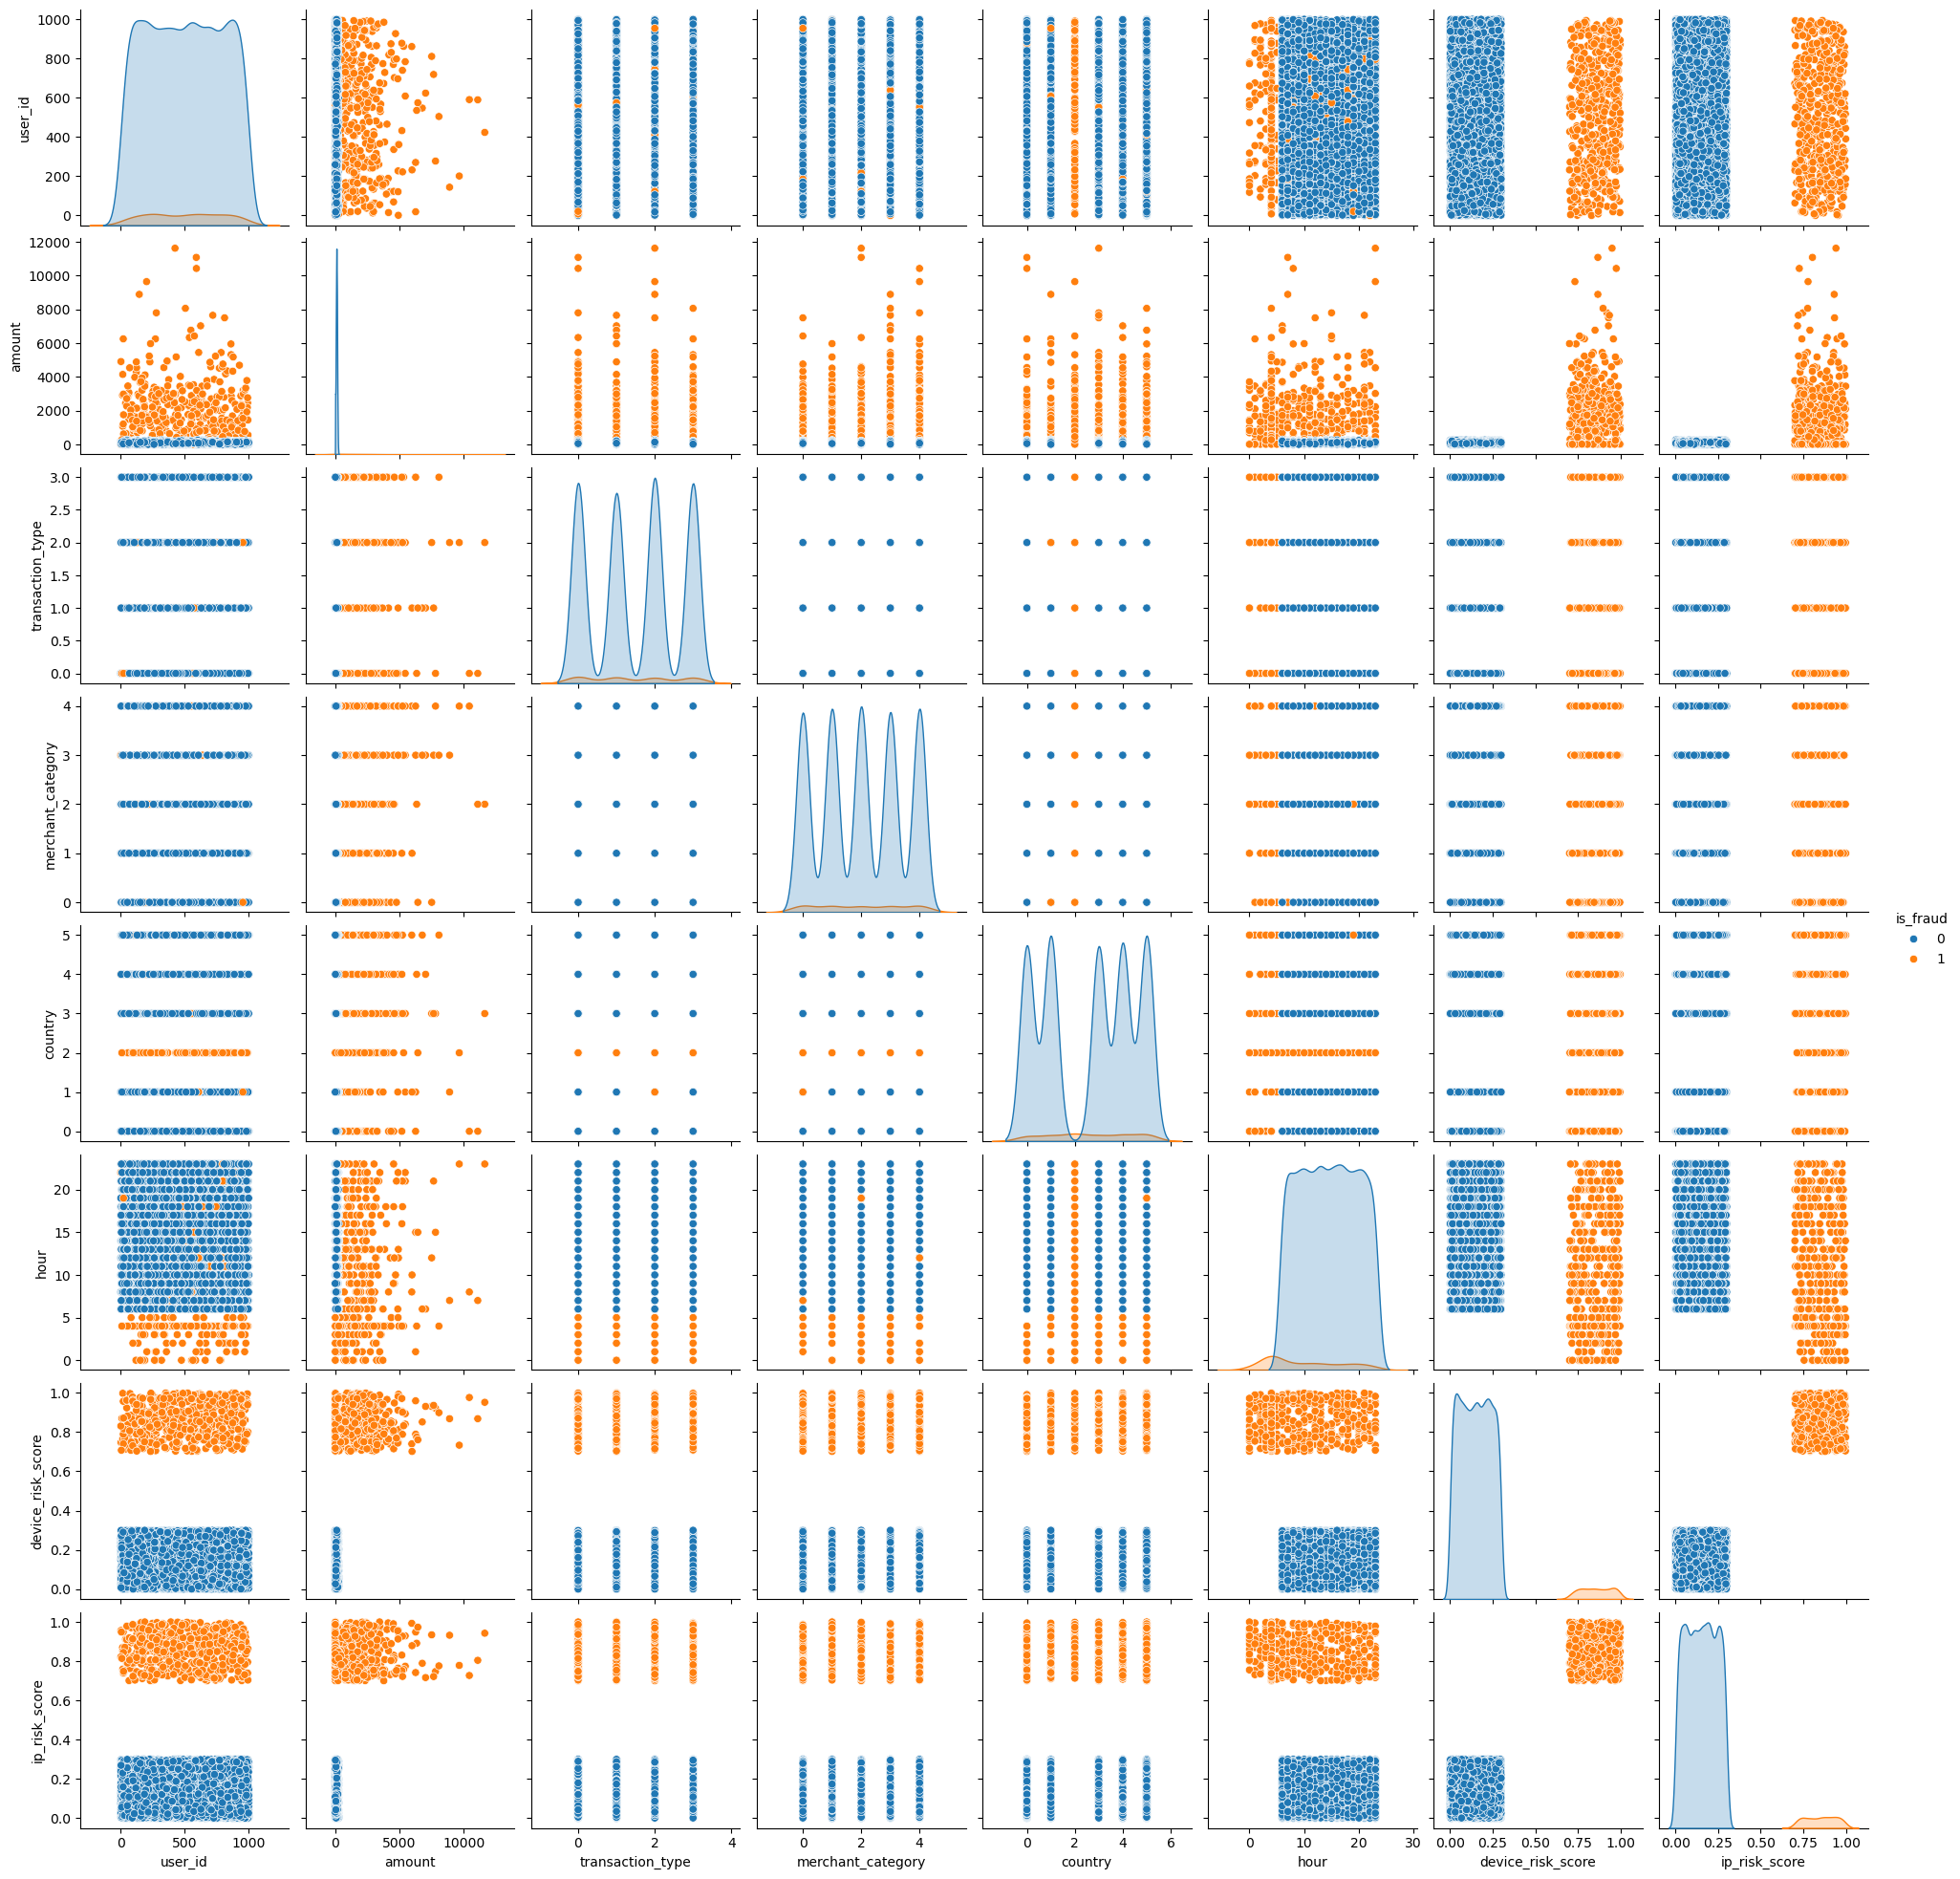

In [14]:
sns.pairplot(data=ds, hue="is_fraud")
plt.show()


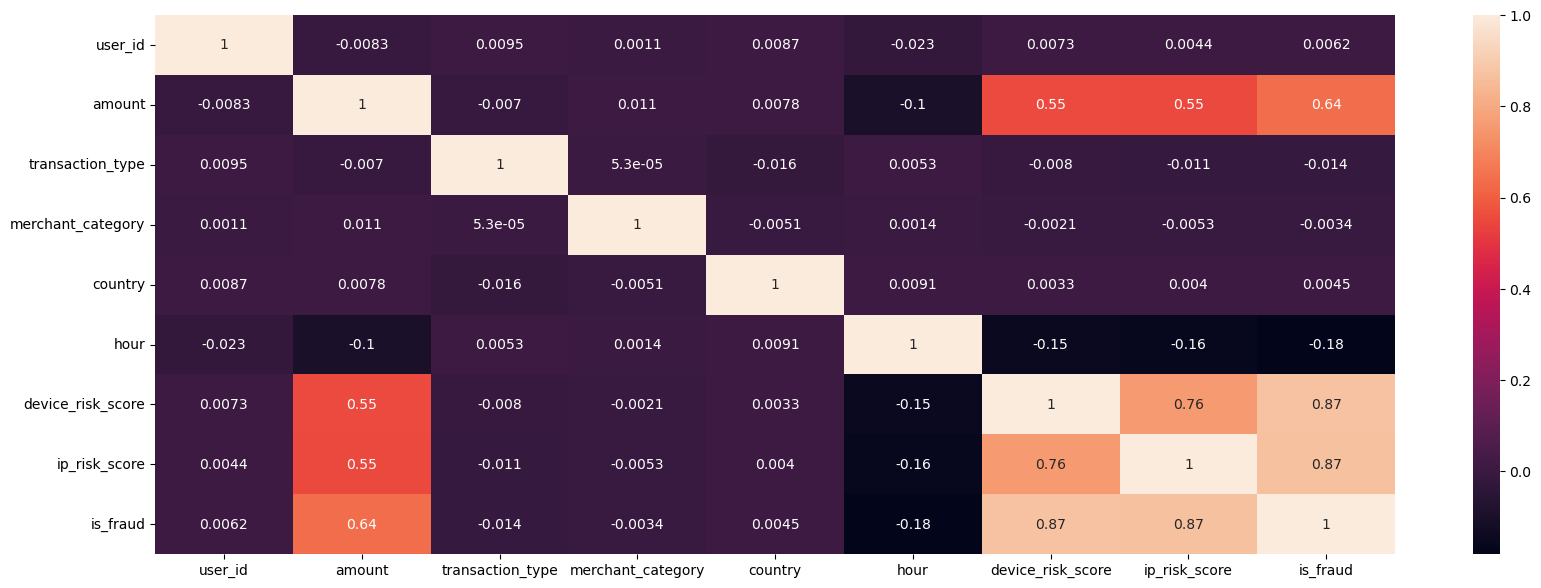

In [15]:
plt.figure(figsize=(20,7))
sns.heatmap(data=ds.corr(), annot=True)

#plt.savefig("heatmap.png", dpi=300, bbox_inches='tight')   # saved in same folder
plt.show()


In [16]:
ds["is_fraud"].value_counts(normalize=True) * 100


is_fraud
0    95.0
1     5.0
Name: proportion, dtype: float64

In [17]:
# Features (X) and target (y)
X = ds[
    [
        "amount",
        "transaction_type",
        "merchant_category",
        "country",
        "hour"
    ]
]

y = ds["is_fraud"]


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x=scaler.transform(X)

In [20]:
from imblearn.over_sampling import SMOTE
#Synthetic Minority Oversampling Technique
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)


In [21]:
print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_res).value_counts())


Before SMOTE:
is_fraud
0    7600
1     400
Name: count, dtype: int64

After SMOTE:
is_fraud
0    7600
1    7600
Name: count, dtype: int64


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(x_train_res, y_train_res)
y_pred_rf = rf.predict(x_test)


In [23]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_score(rf,X,y, cv=skf)

array([0.9935, 0.9975, 0.9975, 0.996 , 0.9975])

In [24]:
acu_test=rf.score(x_test,y_test)
print("Accuracy_test",acu_test)
acu_train=rf.score(x_train,y_train)
print("Accuracy_train",acu_train)


Accuracy_test 0.9955
Accuracy_train 1.0


In [25]:
from sklearn.metrics import confusion_matrix,roc_auc_score
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))



Confusion Matrix:
[[1895    5]
 [   4   96]]


In [26]:
roc_auc = roc_auc_score(y_test, y_pred_rf)
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.9786842105263158


In [30]:
ds["predicted"]=rf.predict(x)
result=ds[["is_fraud","predicted"]]
#result_sorted = result.sort_values(by="user_id")
result.head()
#ds.to_csv("full_dataset_with_predictions.csv", index=False)


,is_fraud,predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


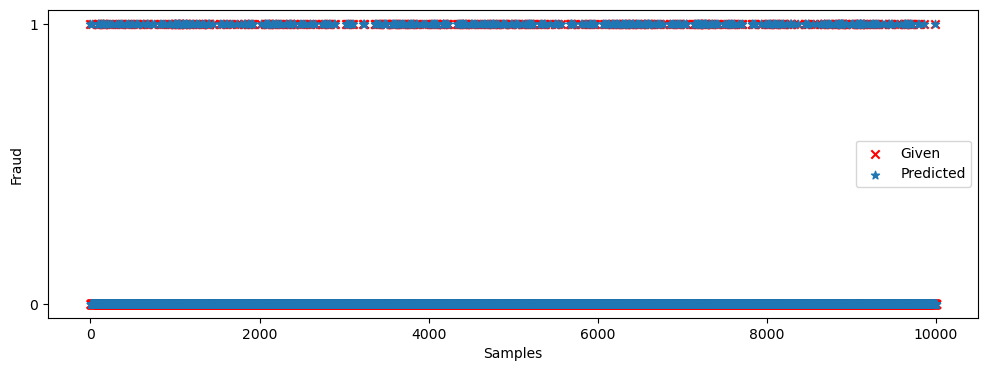

In [31]:
plt.figure(figsize=(12,4))

plt.scatter(ds.index, ds["is_fraud"],label="Given",marker="x",color='red')
plt.scatter(ds.index, result["predicted"], label="Predicted",marker= "*")#
#plt.savefig("Comparison.png", dpi=300, bbox_inches='tight')   # saved in same folder

plt.yticks([0,1])
plt.xlabel("Samples")
plt.ylabel("Fraud")
plt.legend()
plt.show()


In [35]:
amount = float(input("Enter the amount : "))
transaction_type = input("Enter the transition type : ").strip()
merchant_category = input("Enter the merchant_category : ").strip()
country = input("Enter the country : ").strip()
hour = float(input("Enter the hour : "))

new_data = pd.DataFrame({
    'amount': [amount],
    'transaction_type': [transaction_type],
    'merchant_category': [merchant_category],
    'country': [country],
    'hour': [hour]
})

categorical_cols = ["transaction_type", "merchant_category", "country"]

# encoding
for col in categorical_cols:
    new_data[col] = encoders[col].transform(new_data[col])

# ✅ correct scaling
Tran = scaler.transform(new_data)

# ✅ correct prediction
predict = rf.predict(Tran)[0]

if predict == 0:
    print("✅ It may NOT be Fraud")
else:
    print("⚠️ It may be Fraud")





Enter the amount :  133
Enter the type :  Online
Enter the merchant_category :  Travel
Enter the country :  DE
Enter the hour :  12


✅ It may NOT be Spam
